# London Crime by LSOA

In [1]:
#Memasukkan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins

## Explore Data

In [2]:
#Membaca data london crime by lsoa
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
#Mengurutkan data berdasarkan tahun
df.sort_values(by='year', ascending=True, axis=0, inplace=True)

In [4]:
df_new = df['value'] >= 1
df_new

12504370    False
5807276     False
5807272     False
8512153     False
5807264     False
            ...  
6171475      True
6171480     False
11948556    False
6171412     False
0           False
Name: value, Length: 13490604, dtype: bool

In [5]:
df_new = df[df['value'] >= 1]
df_new

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
2874646,E01003986,Southwark,Robbery,Business Property,1,2008,7
8512166,E01000928,Camden,Criminal Damage,Other Criminal Damage,1,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
...,...,...,...,...,...,...,...
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12


In [6]:
df_new.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
2874646,E01003986,Southwark,Robbery,Business Property,1,2008,7
8512166,E01000928,Camden,Criminal Damage,Other Criminal Damage,1,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11


In [7]:
df_new.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12
6171475,E01001309,Ealing,Theft and Handling,Other Theft,1,2016,5


In [8]:
df_new.groupby("borough", sort=True)["value"].sum().sort_values(ascending=True)

borough
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

In [9]:
#Menampilkan kolom yang ada pada df1
df_new.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [10]:
df_new.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [11]:
df_year_crime = df_new.groupby("year", sort=True)["value"].sum()
df_year_crime = pd.DataFrame(df_year_crime).reset_index()
df_year_crime

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


In [12]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
year = df_new.pivot_table(values='value', index=['year'], aggfunc=np.sum, fill_value=0)
year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


## Visualization Data

### Area Plot
tingkat kejahatan di london berdasarkan tahun terjadinya kejahatan pada tahun 2008 - 2016

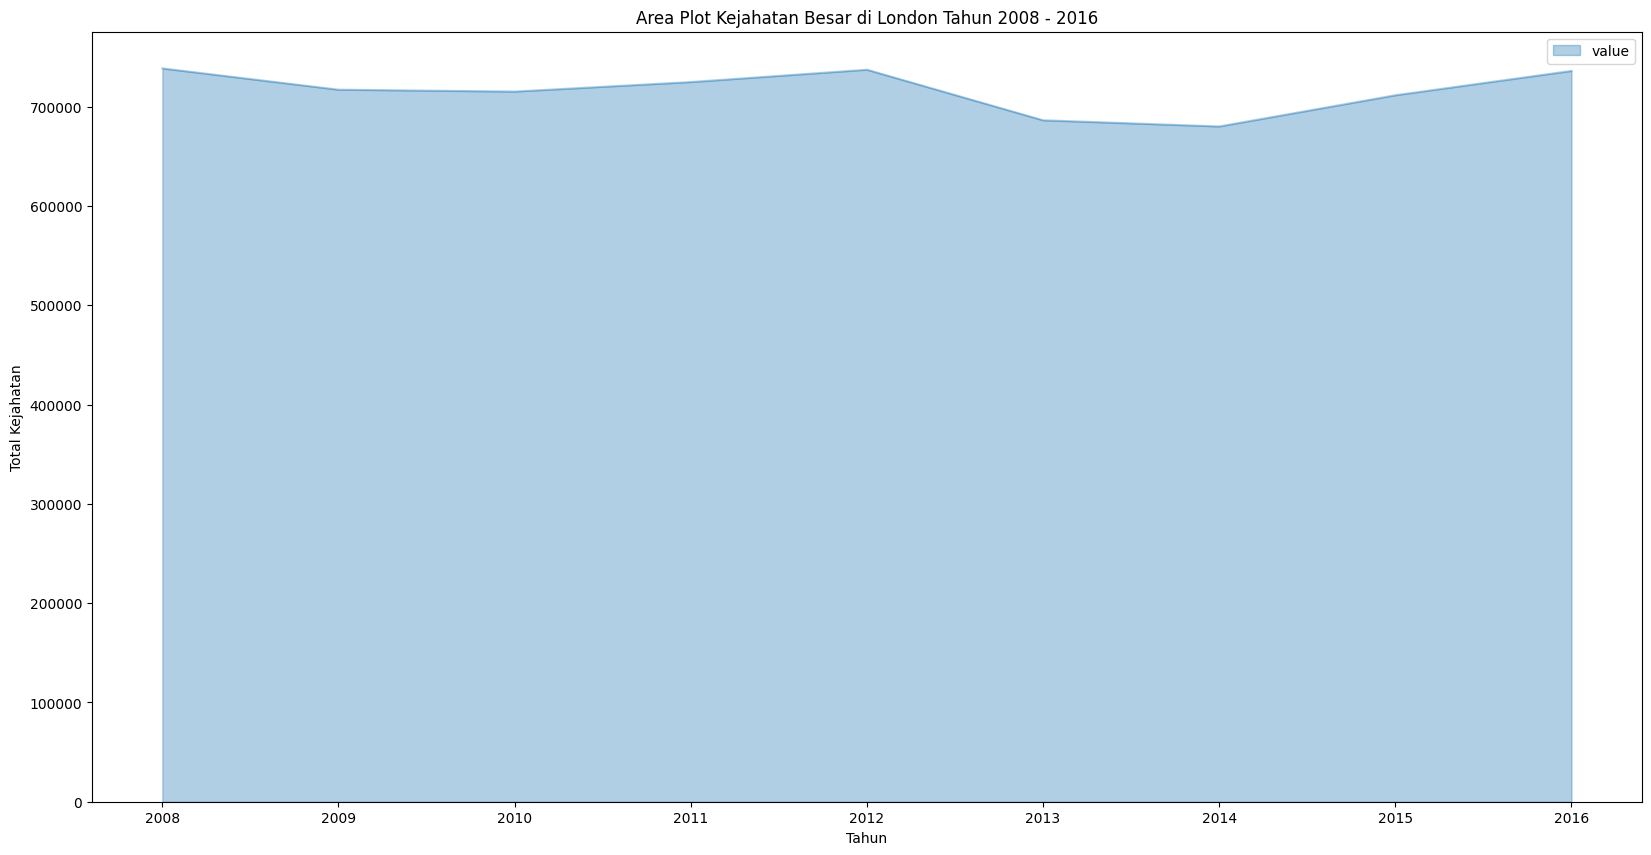

In [13]:
year.plot(kind='area',
           alpha=0.35,
           stacked=False,
           figsize=(20, 10),
          )

plt.title('Area Plot Kejahatan Besar di London Tahun 2008 - 2016')
plt.ylabel('Total Kejahatan') 
plt.xlabel('Tahun') 

plt.show()

Dari data diatas dapat disimpulkan bahwa jumlah kejahatan yang terjadi dari tahun 2008 sampai 2016 relatif sama dapat dilihat dari data tahun 2008 yang berjumlah sekitar 730.000 yang merupakan tahun dengan jumlah kejahatan paling tinggi dan di tahun - tahun berikutnya tidak pernah jauh nilainya, di tahun 2014 pun turunnya jumlah kejahatan hanya sekitar 50.000 dan ditahun berikutnya jumlah kejahatan naik lagi di 700.000 keatas

### Histogram
semua kasus kejahatan kategori minor di london pada tahun 2008 - 2016

In [14]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
df_minor = df_new.pivot_table(values='value', index=['year'],columns=['minor_category'], aggfunc=np.sum, fill_value=0)
df_minor

minor_category,Assault with Injury,Burglary in Other Buildings,Burglary in a Dwelling,Business Property,Common Assault,Counted per Victim,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Drug Trafficking,...,Other Theft Person,Other violence,Personal Property,Possession Of Drugs,Rape,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle,Wounding/GBH
year,,,,,,,,,,,,,,,,,,,,,
2008,56586,31437,56655,2964,37356,3840,23519,41693,9011,4203,...,24453,7721,26663,64228,268,76570,32857,28303,15895,8701
2009,55297,30434,60185,3115,39671,0,22475,36621,8348,4172,...,27549,7571,26453,56070,0,68856,36349,24476,20721,10005
2010,54173,29703,57123,3041,41591,0,20253,32907,7962,4252,...,29547,6947,29300,54026,0,69709,36935,24890,19726,8033
2011,50768,30876,62439,2685,40502,0,18037,29494,7445,4460,...,36090,6414,33994,52769,0,69604,36351,26161,20885,7628
2012,50369,31676,61716,2450,39246,0,15330,25777,6753,3964,...,46585,6623,32810,47491,0,68198,36562,22464,21339,7151
2013,39929,30685,56537,2026,37882,0,13512,23452,6367,4151,...,44964,7628,27311,45755,0,63509,36441,20377,18708,15526
2014,45677,27078,48975,1642,51244,0,13391,24137,6641,3830,...,30957,7785,20508,40309,0,52167,40141,21653,17186,21556
2015,48164,25833,44656,1718,61758,0,13648,25595,6776,3395,...,33829,9501,19665,36097,0,50024,42549,21848,16513,23431
2016,50038,25289,42996,1654,64440,0,13951,25787,6700,3392,...,34868,10588,20874,35203,0,51319,46957,26366,18001,23525


In [15]:
df_new.groupby("minor_category", sort=True)["value"].sum().sort_values(ascending=True)

minor_category
Rape                                         268
Murder                                       949
Other Sexual                                1005
Other Fraud & Forgery                       1485
Other Drugs                                 2998
Counted per Victim                          3840
Going Equipped                              5530
Handling Stolen Goods                      16100
Business Property                          21295
Drug Trafficking                           35819
Offensive Weapon                           37983
Motor Vehicle Interference & Tampering     56224
Criminal Damage To Other Building          66003
Other violence                             70778
Other Notifiable                          100819
Wounding/GBH                              125556
Other Criminal Damage                     145356
Criminal Damage To Dwelling               154116
Theft/Taking of Pedal Cycle               168974
Theft/Taking Of Motor Vehicle             216538
Perso

Text(0, 0.5, 'Jumlah Laporan')

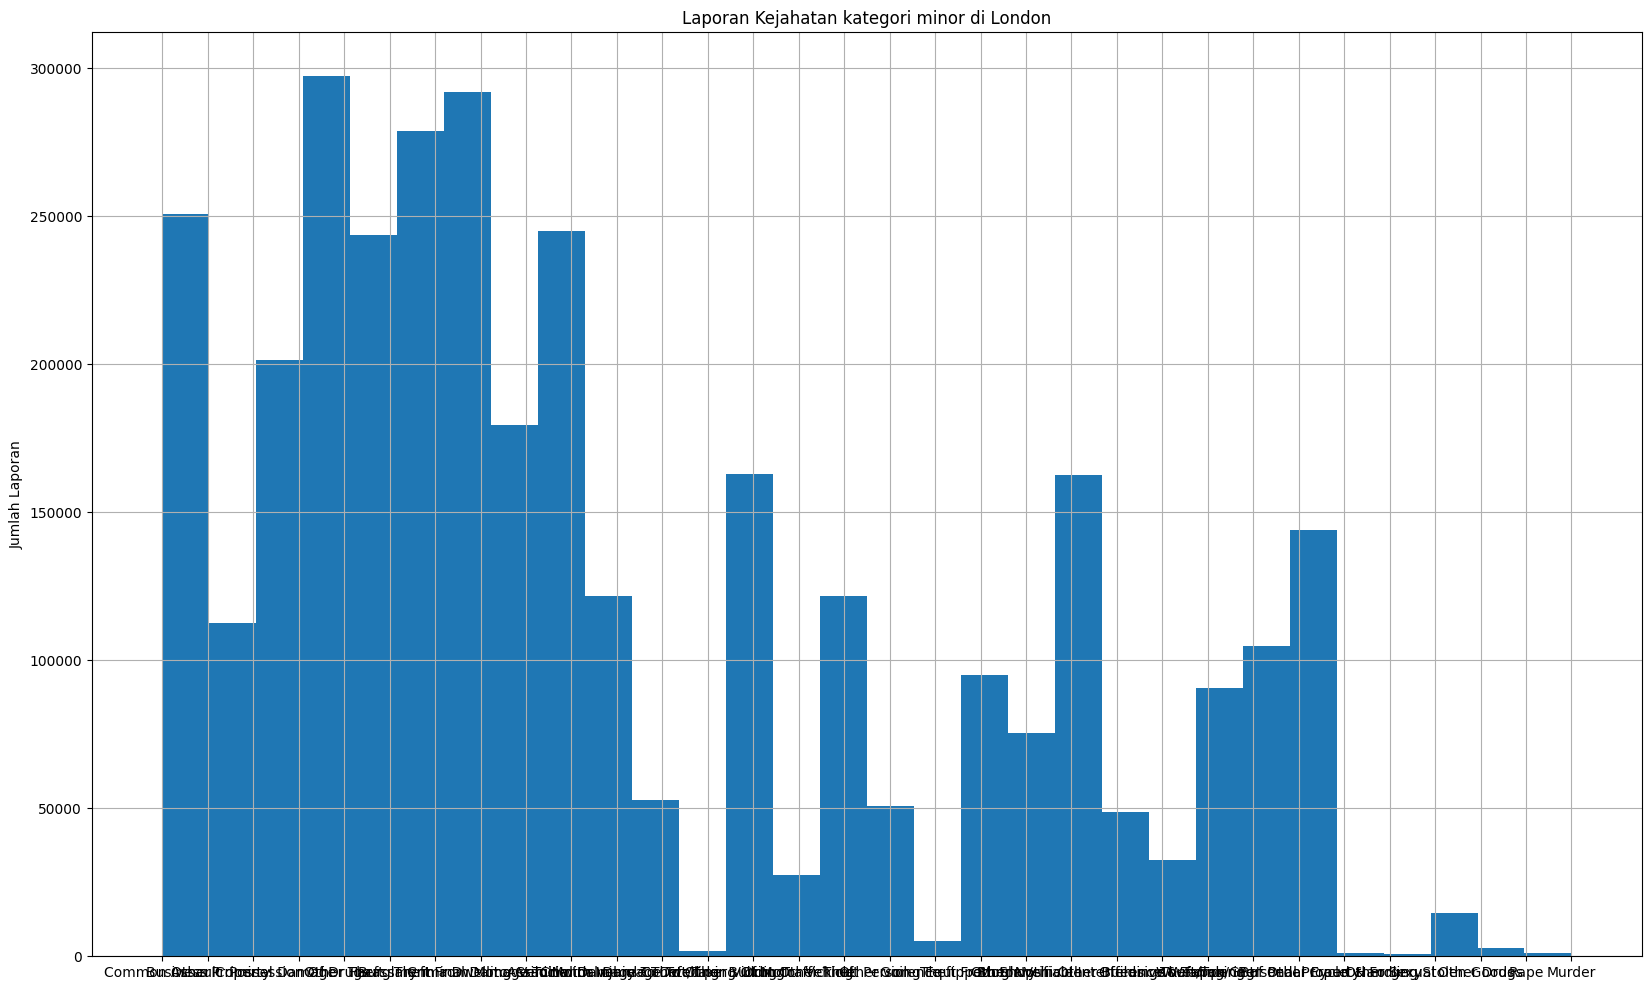

In [16]:
df_new.minor_category.hist(bins=30, figsize=(20, 12))

plt.title('Laporan Kejahatan kategori minor di London')
plt.ylabel('Jumlah Laporan')

Dari data diatas didapatkan berupa kejahatan kategori minor paling banyak terjadi dari tahun 2008 - 2016 yaitu 'Other Thief' dan paling sedikit terjadi yaitu 'Rape'

### Bar Chart
Semua kejahatan kategori major di london pada tahun 2008 - 2016

In [17]:
#Menampilkan total kejahatan kecil berdasarkan kategori per tahun dalam bentuk tabel
df_major = df_new.pivot_table(values='value', index=['year'],columns=['major_category'], aggfunc=np.sum, fill_value=0)
df_major

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [18]:
df_new.groupby("major_category", sort=True)["value"].sum().sort_values(ascending=True)

major_category
Sexual Offences                   1273
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Drugs                           470765
Criminal Damage                 630938
Burglary                        754293
Violence Against the Person    1558081
Theft and Handling             2661861
Name: value, dtype: int64

Text(0.5, 1.0, 'Jumlah Kejahatan paling banyak dilakukan di london')

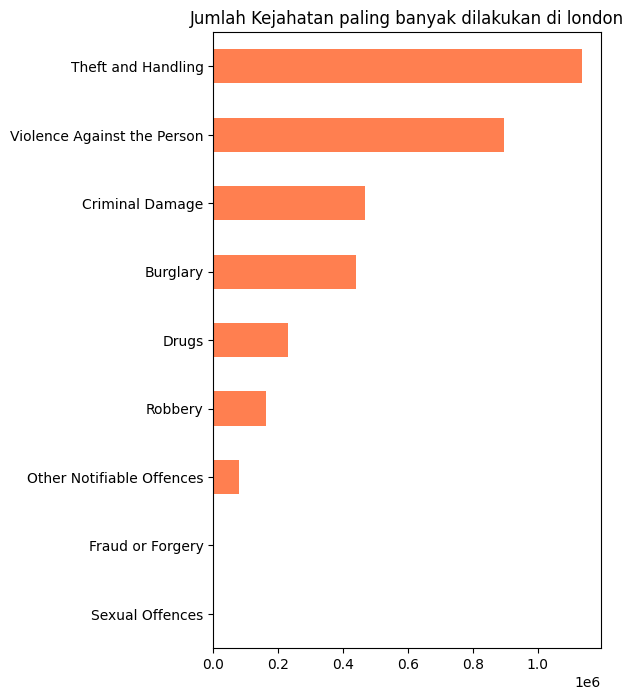

In [19]:
df_new.major_category.value_counts().sort_values(ascending=True).plot.barh(figsize=(5, 8), color='coral')

plt.title("Jumlah Kejahatan paling banyak dilakukan di london")

Dari data diatas didapatkan berupa kejahatan kategori major paling banyak terjadi dari tahun 2008 - 2016 yaitu 'Theft and Handling' dan paling sedikit terjadi yaitu 'Sexual Offences'

### Pie Chart
kasus kejahatan kategori major yang ada di Westminster

In [42]:
totalcrimes = df_new['borough'].value_counts()
borough = pd.DataFrame(data=totalcrimes.index, columns=["borough"])
borough['values'] = totalcrimes.values

In [44]:
df_new.groupby("borough", sort=True)["value"].sum().sort_values(ascending=True)

borough
City of London               780
Kingston upon Thames       89306
Richmond upon Thames       96771
Sutton                    100987
Bexley                    114136
Merton                    115654
Harrow                    116848
Havering                  138947
Barking and Dagenham      149447
Kensington and Chelsea    171981
Greenwich                 181568
Redbridge                 183562
Bromley                   184349
Hammersmith and Fulham    185259
Hounslow                  186772
Enfield                   193880
Waltham Forest            203879
Wandsworth                204741
Hillingdon                209680
Barnet                    212191
Haringey                  213272
Lewisham                  215137
Hackney                   217119
Brent                     227551
Tower Hamlets             228613
Islington                 230286
Ealing                    251562
Croydon                   260294
Newham                    262024
Camden                    275147
So

In [81]:
df_westminster = df_new.drop(['month'], axis=1)
df_westminster = df_new[
    (df_new['borough'] == 'Westminster') & 
    (df_new['year'] == 2016)]

df_westminster

,lsoa_code,borough,major_category,minor_category,value,year,month
3195973,E01004649,Westminster,Robbery,Business Property,1,2016,12
12620734,E01033606,Westminster,Violence Against the Person,Common Assault,1,2016,8
61272,E01004659,Westminster,Theft and Handling,Theft From Motor Vehicle,2,2016,5
3574517,E01004721,Westminster,Robbery,Personal Property,1,2016,1
3197310,E01004654,Westminster,Drugs,Possession Of Drugs,1,2016,7
...,...,...,...,...,...,...,...
6169640,E01004666,Westminster,Other Notifiable Offences,Other Notifiable,2,2016,10
11949086,E01004649,Westminster,Theft and Handling,Motor Vehicle Interference & Tampering,1,2016,6
6170848,E01004696,Westminster,Theft and Handling,Other Theft Person,1,2016,2
6169998,E01004750,Westminster,Criminal Damage,Criminal Damage To Other Building,2,2016,12


In [51]:
df_westminster_total_crime = df_westminster.groupby('major_category',sort=True)['value'].sum().sort_values(ascending=True)
df_westminster_total_crime

major_category
Other Notifiable Offences        708
Robbery                         1822
Drugs                           2049
Criminal Damage                 2179
Burglary                        3218
Violence Against the Person    10834
Theft and Handling             27520
Name: value, dtype: int64

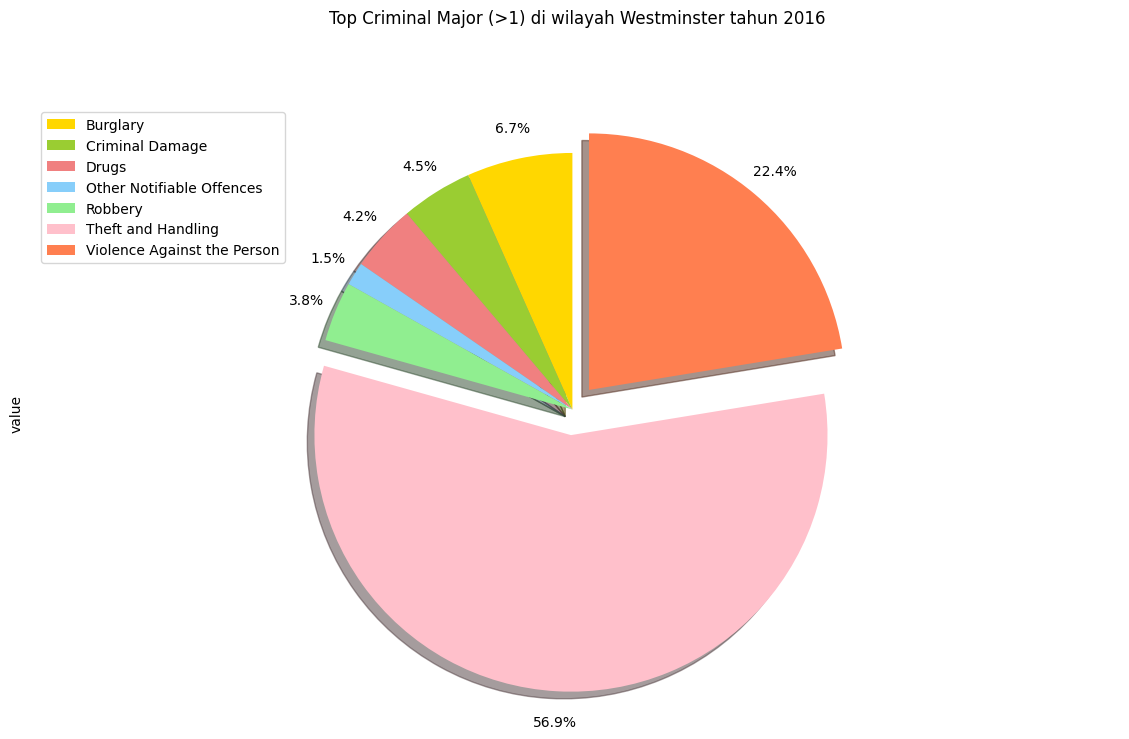

In [50]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'coral']

explode_list = [0, 0, 0, 0, 0, 0.1, 0.1]

df_westminster_total_crime.plot(
                                kind = 'pie',
                                figsize = (14, 8),
                                autopct = '%1.1f%%',
                                startangle = 90,
                                shadow = True,
                                labels = None,
                                colors = color_list,
                                pctdistance = 1.12,      
                                explode = explode_list
                            )

plt.title('Top Criminal Major (>1) di wilayah Westminster tahun 2016', y=1.12)
plt.axis('equal')

plt.legend(labels=df_westminster_total_crime.index, loc='upper left')

plt.show()

Dari data diatas didapatkan berupa kejahatan kategori major paling banyak terjadi di Westminster tahun 2016 yaitu 'Theft and Handling ' dan paling sedikit terjadi yaitu 'Other Notifiable Offences'

### Box Plots
maksimal kasus kejahatan yang terjadi pada 2008 - 2016

Text(0, 0.5, 'Jumlah Laporan')

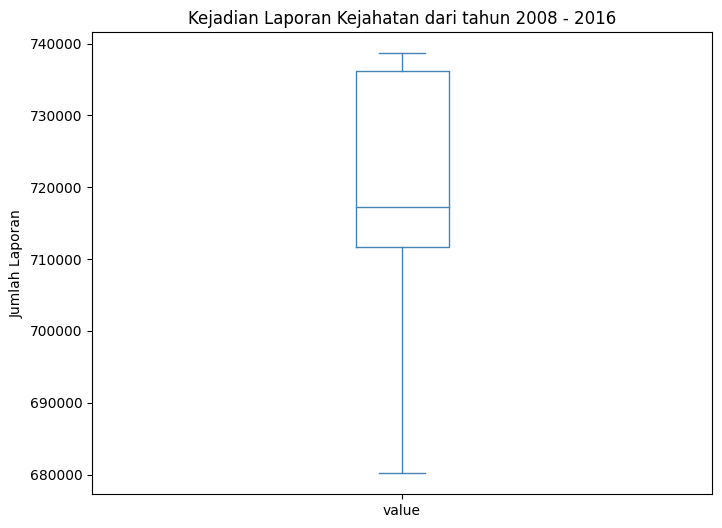

In [52]:
year.plot.box(figsize=(8, 6), color='steelblue')

plt.title('Kejadian Laporan Kejahatan dari tahun 2008 - 2016')
plt.ylabel('Jumlah Laporan')

Dari data diatas didapatkan berupa laporan kejahatan yang diteri maksinal yaitu 740000 kasus

In [63]:
df_scatter = df_major[['Theft and Handling','Other Notifiable Offences']]
df_scatter = df_scatter.reset_index()
df_scatter

major_category,year,Theft and Handling,Other Notifiable Offences
0,2008,283692,10112
1,2009,279492,10644
2,2010,290924,10768
3,2011,309292,10264
4,2012,334054,10675
5,2013,306372,10811
6,2014,279880,13037
7,2015,284022,14229
8,2016,294133,15809


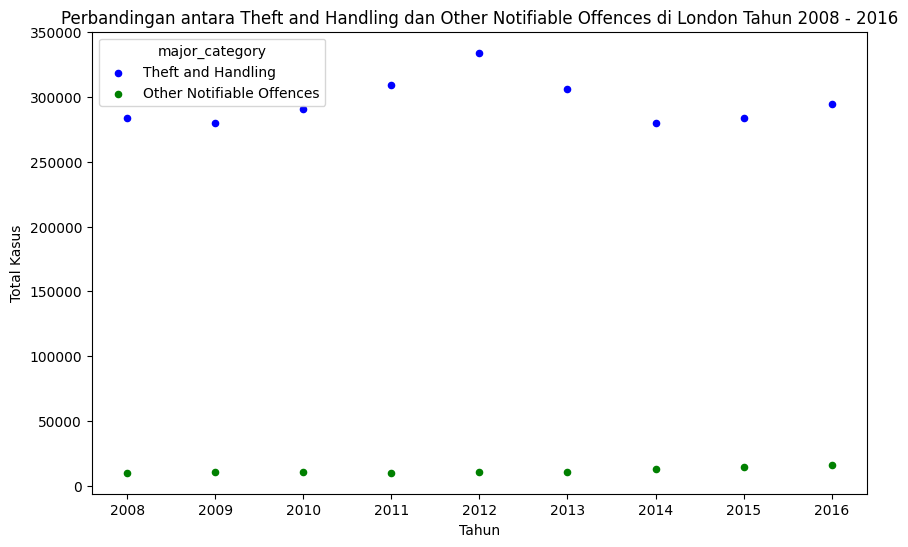

In [64]:
ax1 = df_scatter.plot(kind='scatter', x='year', y='Theft and Handling', figsize=(10, 6), color='blue', label='Theft and Handling')
ax2 = df_scatter.plot(kind='scatter', x='year', y='Other Notifiable Offences', figsize=(10, 6), color='green',label='Other Notifiable Offences', ax=ax1 )

plt.title('Perbandingan antara Theft and Handling dan Other Notifiable Offences di London Tahun 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kasus')

plt.show()

Dari data diatas didapatkan kesimpulan bahwa kejahatan 'Theft and Handling' yang merupakan salah satu kejahatan paling banyak laporan kasusnya terjadi lebih dari 280.000 kasus setiap tahunnya sedangkan kejahatan 'Other Notifiable Offences' yang merupakan salah satu kejahatan paling sedikit laporan kasusnya terjadi kurang dari 50.000 kasus setiap tahunnya

### Word Clouds

In [68]:
word_cloud = df_new.copy()
word_cloud = word_cloud.drop(['lsoa_code', 'borough' ,'value', 'year', 'month'], axis=1)
word_cloud

,major_category,minor_category
1315511,Violence Against the Person,Common Assault
2874646,Robbery,Business Property
8512166,Criminal Damage,Other Criminal Damage
8512169,Drugs,Possession Of Drugs
5807242,Theft and Handling,Other Theft
...,...,...
6171393,Theft and Handling,Theft/Taking of Pedal Cycle
6171437,Burglary,Burglary in a Dwelling
6171449,Drugs,Possession Of Drugs
11948567,Theft and Handling,Motor Vehicle Interference & Tampering


In [69]:
minor = " ".join(i for i in word_cloud.minor_category)
stopwords = set(STOPWORDS)
wordCloud = WordCloud(stopwords=stopwords, background_color="white").generate(minor)

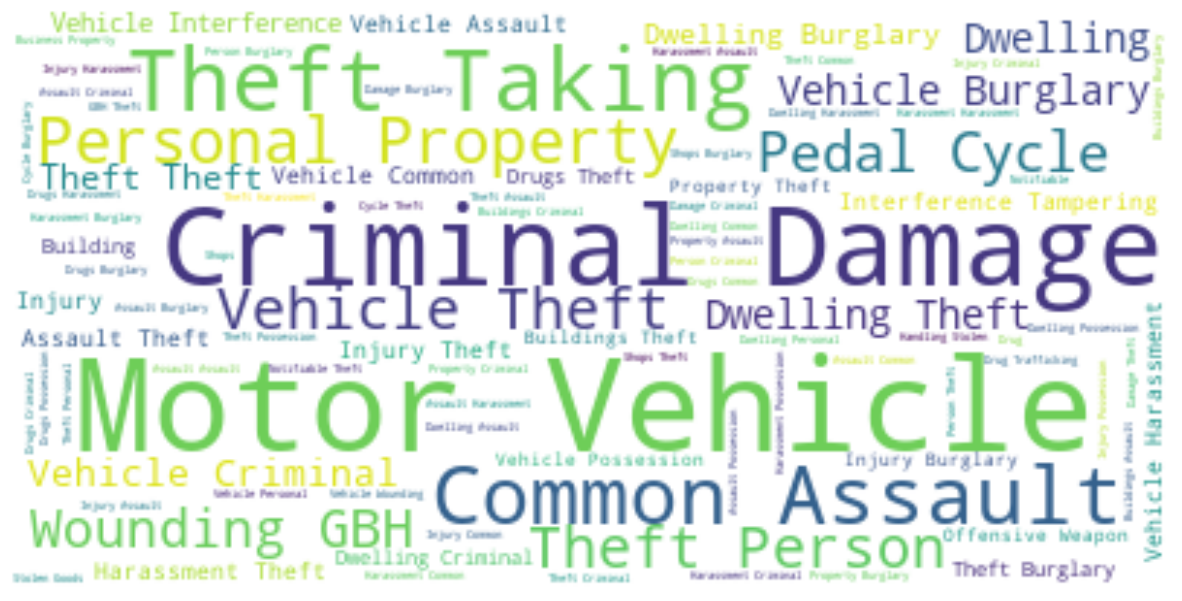

In [70]:
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Folium Maps

In [71]:
map_crimes = df_new.copy()
map_crimes

,lsoa_code,borough,major_category,minor_category,value,year,month
1315511,E01004204,Tower Hamlets,Violence Against the Person,Common Assault,2,2008,9
2874646,E01003986,Southwark,Robbery,Business Property,1,2008,7
8512166,E01000928,Camden,Criminal Damage,Other Criminal Damage,1,2008,9
8512169,E01002676,Hounslow,Drugs,Possession Of Drugs,2,2008,9
5807242,E01002999,Kingston upon Thames,Theft and Handling,Other Theft,2,2008,11
...,...,...,...,...,...,...,...
6171393,E01000439,Bexley,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,12
6171437,E01000108,Barking and Dagenham,Burglary,Burglary in a Dwelling,3,2016,1
6171449,E01001915,Hammersmith and Fulham,Drugs,Possession Of Drugs,3,2016,5
11948567,E01002406,Hillingdon,Theft and Handling,Motor Vehicle Interference & Tampering,5,2016,12


In [72]:
map_crimes = map_crimes.groupby("borough")["value"].sum().sort_values(ascending=False)

In [73]:
map_crimes = pd.DataFrame(map_crimes).reset_index()

In [74]:
top5CrimesMap = map_crimes.head()
top5CrimesMap

,borough,value
0,Westminster,455028
1,Lambeth,292178
2,Southwark,278809
3,Camden,275147
4,Newham,262024


In [75]:
# Longitude
top5CrimesMap.insert(2, 'X', ['-0.135278', '-0.123068', '-0.0833', '-0.140556', '0.035216'])

In [76]:
top5CrimesMap.head()

,borough,value,X
0,Westminster,455028,-0.135278
1,Lambeth,292178,-0.123068
2,Southwark,278809,-0.0833
3,Camden,275147,-0.140556
4,Newham,262024,0.035216


In [77]:
# Latitude
top5CrimesMap.insert(3, 'Y', ['51.494720', '51.457148', '51.4500', '51.536388', '51.525516'])

In [78]:
top5CrimesMap.head()

,borough,value,X,Y
0,Westminster,455028,-0.135278,51.494720
1,Lambeth,292178,-0.123068,51.457148
2,Southwark,278809,-0.0833,51.4500
3,Camden,275147,-0.140556,51.536388
4,Newham,262024,0.035216,51.525516


In [80]:
# create map and display it
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=12)

# Instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(london_map)

# Loop through the 100 crimes and add each to the map
for lat, lng, label in zip(top5CrimesMap.Y, top5CrimesMap.X, top5CrimesMap.borough):
        folium.Marker(
            location = [lat, lng],
            icon=None,
            popup = label
    ).add_to(incidents)
    
    
# Display the map
london_map.add_child(incidents)

## Conclusions

Dari data diatas dapat disimpulkan sebagai berikut :
1. kasus kejahatan di london bisa dikatakan sangat tinggi dengan tingkat kejahatan sekitar 700.000 kasus yang terjadi setiap tahunnya.
2. kasus kejahatan kategori minor paling sering terjadi adalah kasus Burglaty in a Dwelling dan kejahatan kategori major paling sering terjadi adalah kasus Theft and Handling
3. Wilayah dengan total kejahatan paling banyak terjadi dari tahun 2008 - 2016 adalah Westminster